In [236]:
#### import dependencies

In [274]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from xgboost import XGBRFRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [275]:
data = pd.read_csv('Train.csv')


In [276]:
# loading the data
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [277]:
data.shape

(8523, 12)

In [278]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [279]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [280]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [281]:
# replacing the Outlet_ize with mode
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [282]:
mode_of_outlet_table = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [283]:
mode_of_outlet_table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [284]:
missing_values = data['Outlet_Size'].isnull()

In [285]:
data.loc[missing_values, 'Outlet_Size'] = data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_table)

In [286]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

C:\Users\Masterkim\AppData\Local\Temp\ipykernel_7940\1627973040.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Outlet_Sales'])


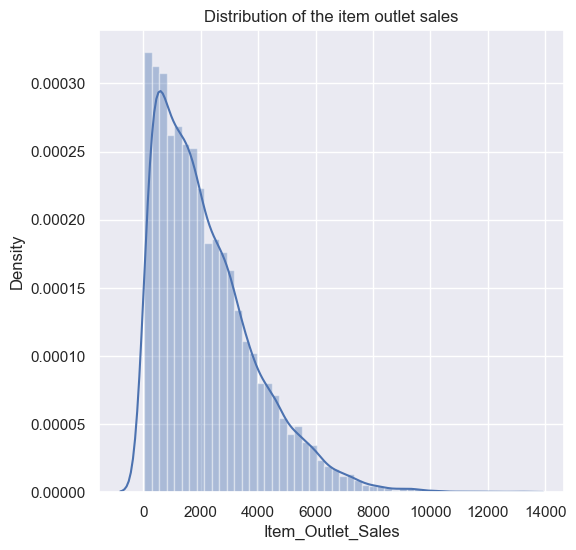

In [287]:
sns.set()
plt.figure(figsize=(6, 6))
sns.distplot(data['Item_Outlet_Sales'])
plt.title("Distribution of the item outlet sales")
plt.show()

In [288]:
data['Item_Outlet_Sales'].fillna(data['Item_Weight'].median(), inplace=True)

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [290]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Figure size 600x600 with 0 Axes>

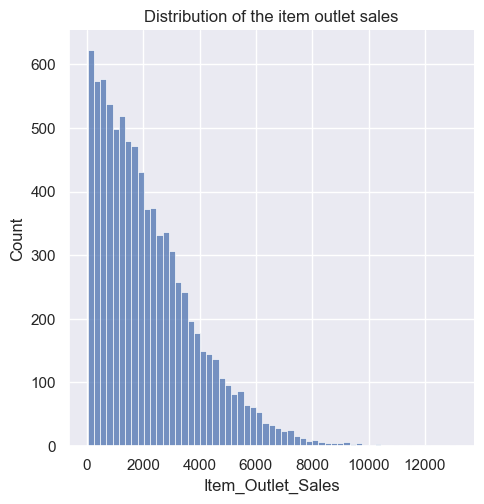

In [291]:
sns.set()
plt.figure(figsize=(6, 6))
sns.displot(data['Item_Outlet_Sales'])
plt.title("Distribution of the item outlet sales")
plt.show()

C:\Users\Masterkim\AppData\Local\Temp\ipykernel_7940\3610160281.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Weight'])


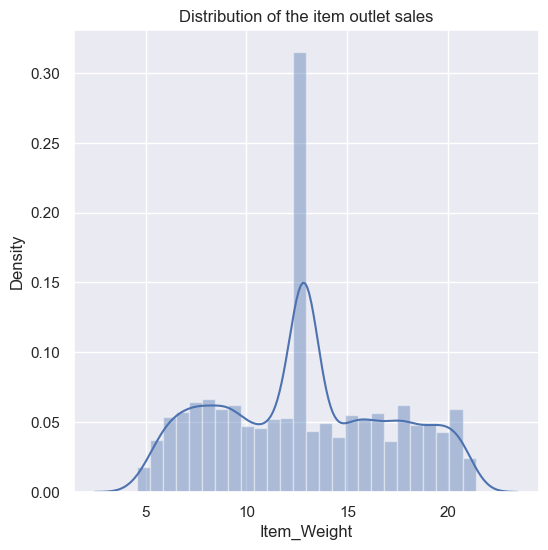

In [292]:
sns.set()
plt.figure(figsize=(6, 6))
sns.distplot(data['Item_Weight'])
plt.title("Distribution of the item outlet sales")
plt.show()

C:\Users\Masterkim\AppData\Local\Temp\ipykernel_7940\1784410610.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Visibility'])


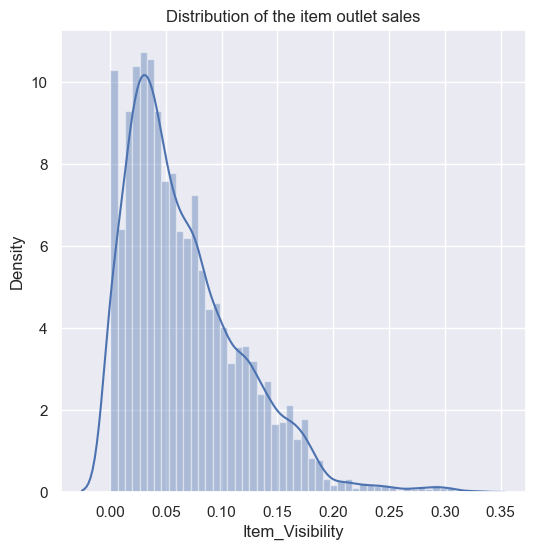

In [293]:
sns.set()
plt.figure(figsize=(6, 6))
sns.distplot(data['Item_Visibility'])
plt.title("Distribution of the item outlet sales")
plt.show()

C:\Users\Masterkim\AppData\Local\Temp\ipykernel_7940\1627973040.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Outlet_Sales'])


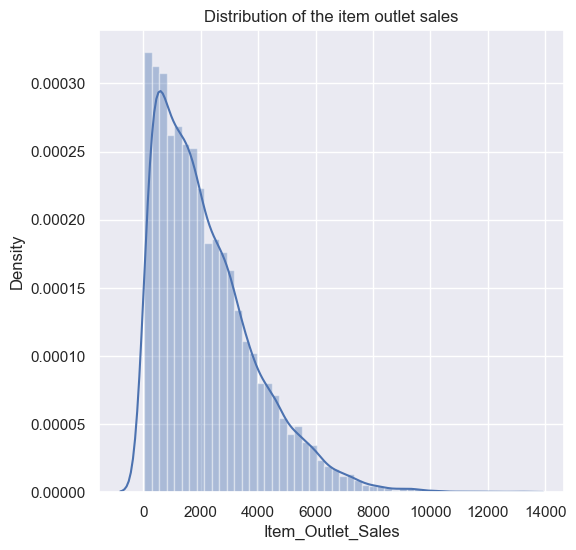

In [294]:
sns.set()
plt.figure(figsize=(6, 6))
sns.distplot(data['Item_Outlet_Sales'])
plt.title("Distribution of the item outlet sales")
plt.show()

C:\Users\Masterkim\AppData\Local\Temp\ipykernel_7940\1624471448.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_MRP'])


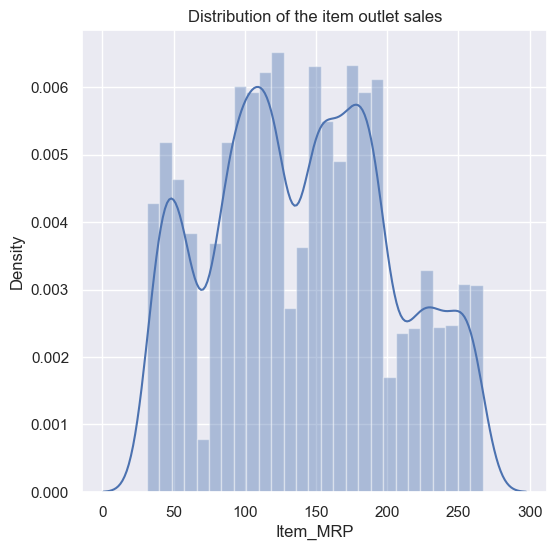

In [295]:
sns.set()
plt.figure(figsize=(6, 6))
sns.distplot(data['Item_MRP'])
plt.title("Distribution of the item outlet sales")
plt.show()

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

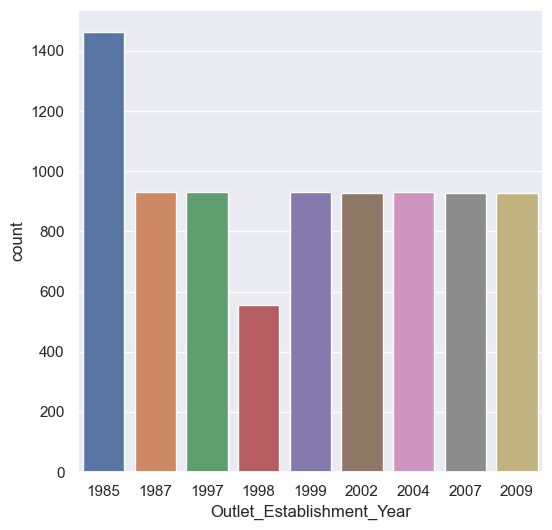

In [296]:
#outlet Establishment 
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=data)

###categorical feartures

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

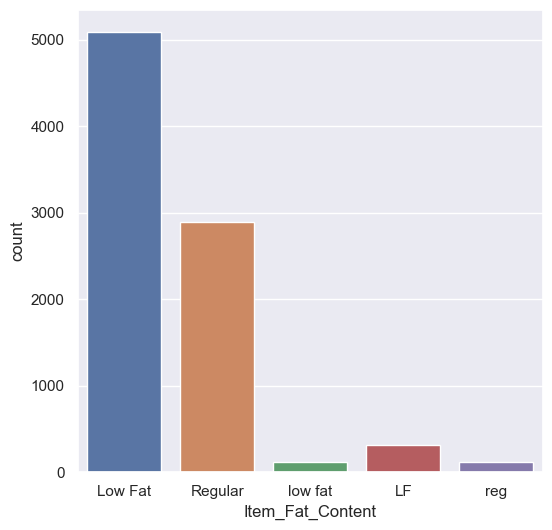

In [297]:
#outlet Establishment 
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=data)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

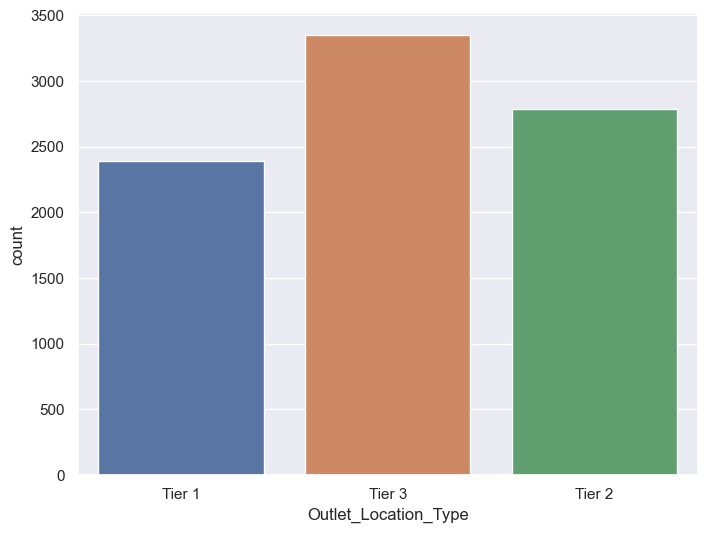

In [298]:
data['Outlet_Location_Type'].value_counts()
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Location_Type', data=data)

<Axes: xlabel='Item_Type', ylabel='count'>

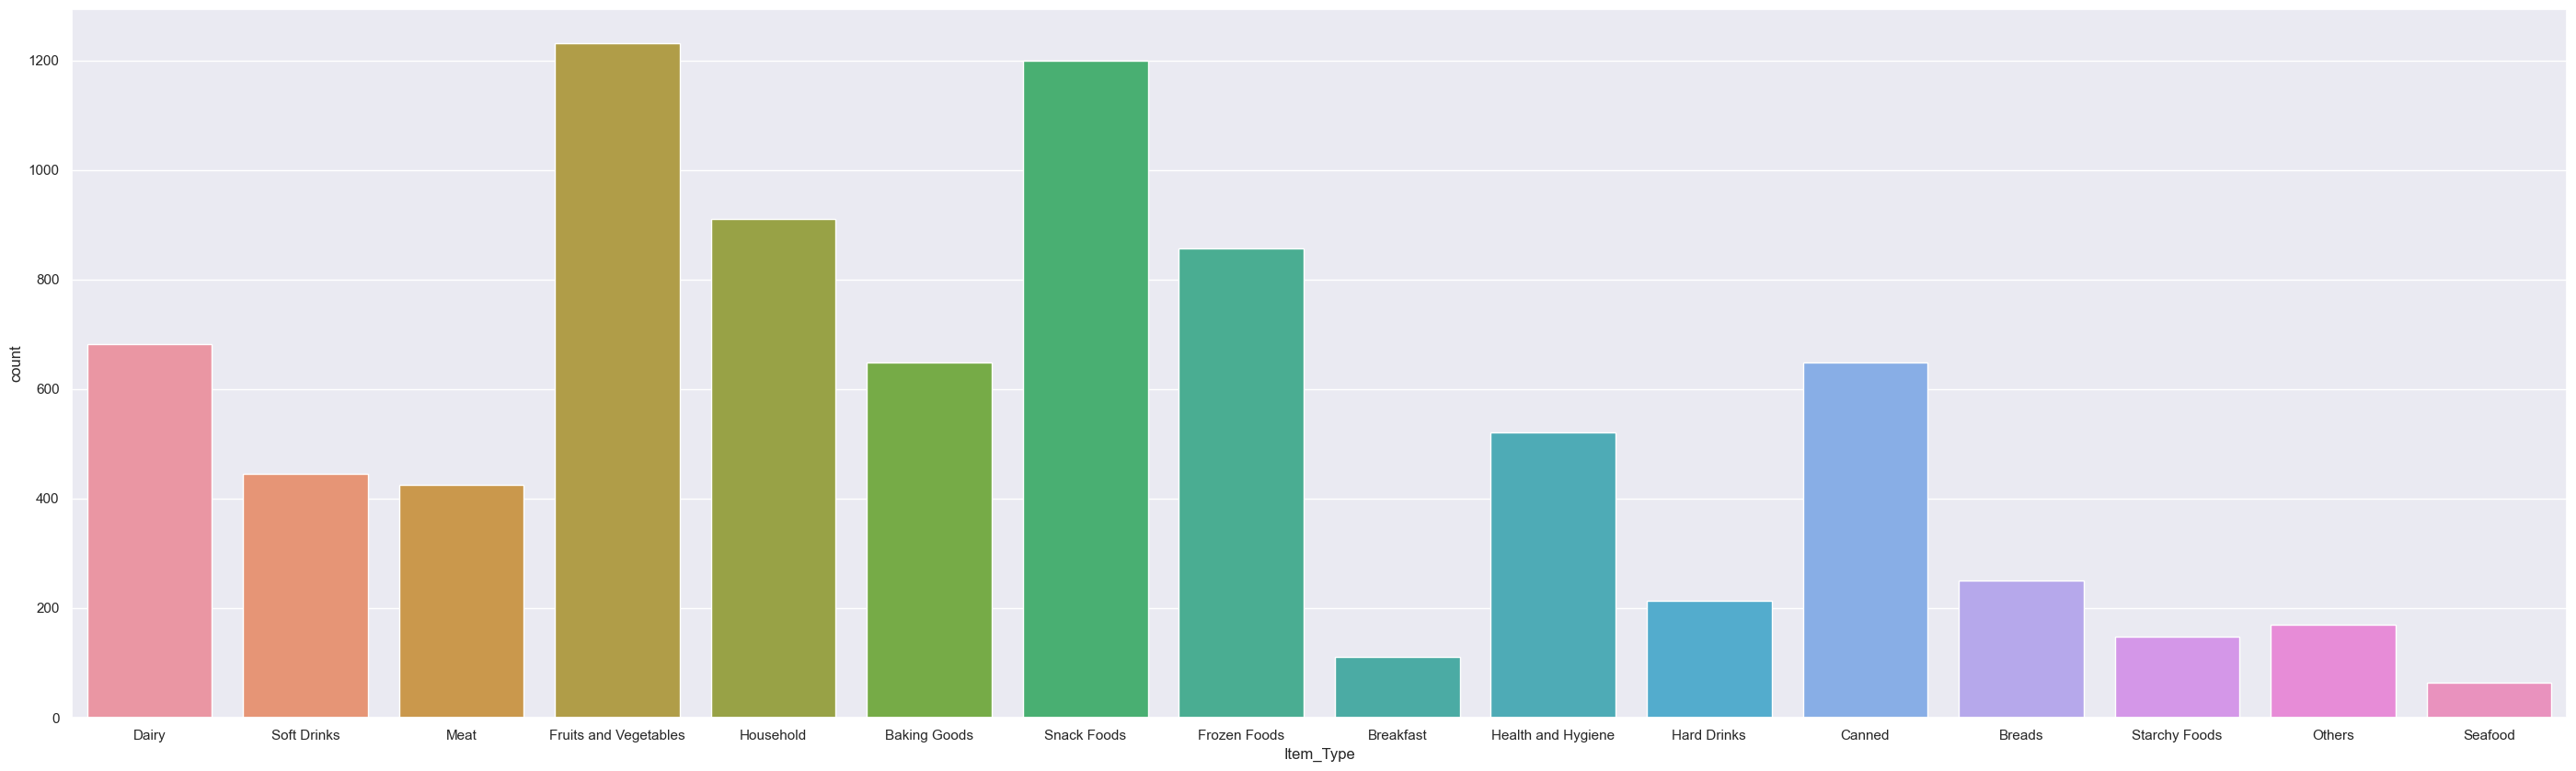

In [299]:
#outlet Establishment 
plt.figure(figsize=(35,10))
sns.countplot(x='Item_Type', data=data)

--  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  Data_Type       

**Data preprocessing

In [300]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [301]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [302]:
data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF':'Low Fat', 'reg' :'Regular'}}, inplace=True)
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

***Labelencoding

In [306]:
encoder = LabelEncoder()

data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])

data['Item_Type'] = encoder.fit_transform(data['Item_Type'])

data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])

data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size']  = encoder.fit_transform(data['Outlet_Identifier'])

data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])



In [310]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,9,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,3,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,9,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,0,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,1,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,1,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,7,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,6,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,3,2,2,1845.5976


In [313]:
###splitting features and data

x = data.drop(columns='Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

**splitting data into train and test split

In [314]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [315]:
###model training  using XGBoost Regressor
regressor = XGBRFRegressor()

In [316]:
regressor.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [317]:
#EVALUATION
training_data_prediction = regressor.predict(x_train)

In [318]:
r2_train = metrics.r2_score(y_train,training_data_prediction)

In [319]:
print("R squared value = ", r2_train)

R squared value =  0.6255823849282155


In [320]:
#EVALUATION
test_data_prediction = regressor.predict(x_test)
r2_test = metrics.r2_score(y_test,test_data_prediction)
print("R squared value = ", r2_test)

R squared value =  0.5816990029701645


In [321]:
mae = metrics.mean_absolute_error(y_test, test_data_prediction)
print("mean absolute error: ", mae)

mean absolute error:  791.2742864844037
